<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2204_Contour_Features_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/Naxalov/ComputerVision/tree/master/shape%20detection

In [2]:
!wget -O image.png https://raw.githubusercontent.com/Naxalov/ComputerVision/master/shape%20detection/05_square.png

--2023-05-17 11:33:15--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/shape%20detection/05_square.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2344 (2.3K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]   2.29K  --.-KB/s    in 0s      

2023-05-17 11:33:15 (33.9 MB/s) - ‘image.png’ saved [2344/2344]



In [3]:
# utility 
def show(img,s=8,b=False):
  plt.figure(figsize=(s,s))
  plt.imshow(img,cmap='gray')
  plt.grid(alpha=.2)
  plt.grid(b)
  plt.show()

In [4]:
# load shape image
img = cv2.imread('image.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

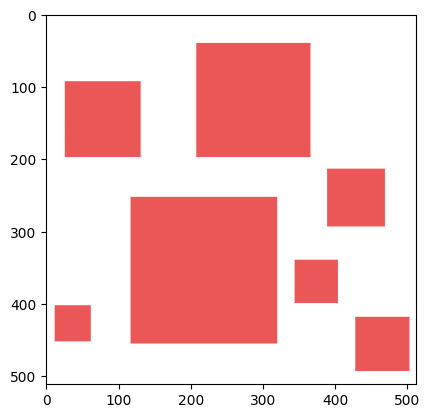

In [5]:
plt.imshow(img)
plt.show()

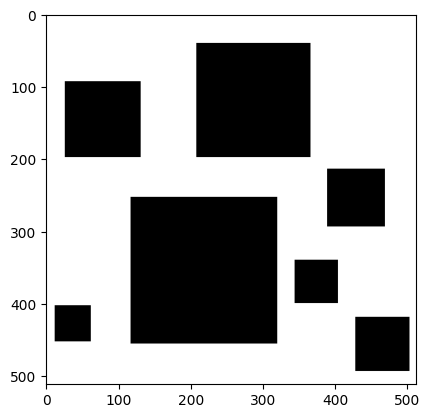

In [6]:
plt.imshow(gray,cmap='gray')
plt.show()

In [7]:
thresh = cv2.inRange(gray, 0, 200)
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)

# Contour Area


In [8]:
area = cv2.contourArea(contours[0])
print(area)

5476.0


In [9]:
for cnt in contours:
  print(cv2.contourArea(cnt))

5476.0
2401.0
3481.0
40804.0
6241.0
10816.0
24649.0


In [10]:
l=[]
for i in contours:
  l.append(int(cv2.contourArea(i)))
print(l)

[5476, 2401, 3481, 40804, 6241, 10816, 24649]


In [11]:
l1=[]
for i in l:
  l1.append(l.index(i))
print(l1)

[0, 1, 2, 3, 4, 5, 6]


In [17]:
def draw(fil):
  for i in l1:
    img_area = cv2.drawContours(fil,contours,i,(255,255,0),2)
  return img_area
draw(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

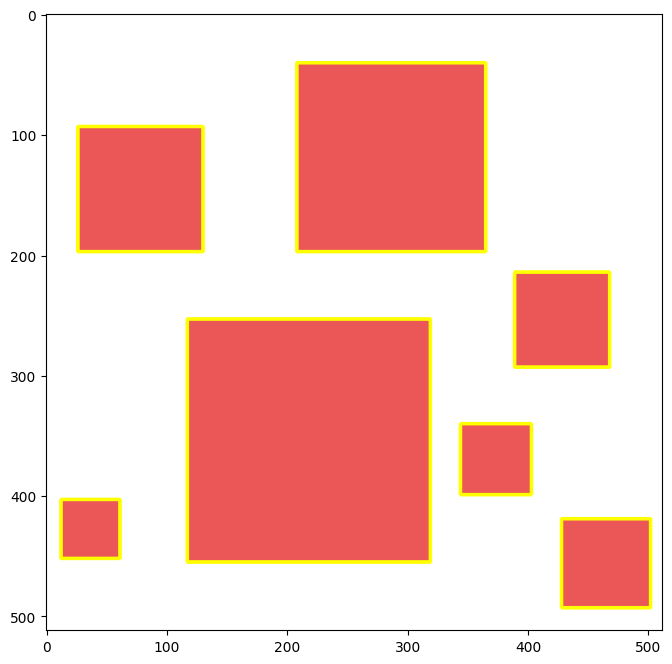

In [18]:
show(img_area)